In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [195]:
#pip install openpyxl

In [196]:
#pip install seaborn

**Clean EV Sales Datasets**

In [197]:
pev_sales_path = '/Users/claudinemaurahandali/Desktop/Dsc190/dsc190/10567_pev_sales_2-28-20.xlsx'
gas_prices_path = '/Users/claudinemaurahandali/Desktop/Dsc190/dsc190/10641_gasoline_prices_by_year_1-26-24.xlsx'


In [198]:
pev_sales = pd.read_excel(pev_sales_path, skiprows=1)

In [199]:
pev_sales.columns = pev_sales.iloc[0]  # use the second row as headers
pev_sales = pev_sales.drop(index=0).reset_index(drop=True)

In [200]:
#cleaning
pev_sales = pev_sales.dropna(axis=1, how='all')
pev_sales.columns = pev_sales.columns.astype(str).str.strip().str.replace(r'\.0', '', regex=True)
for col in pev_sales.columns[2:]:
    pev_sales[col] = pd.to_numeric(pev_sales[col], errors='coerce')

pev_sales.head()

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,7671.0,23461.0,23094.0,18805.0,15393.0,24739.0,20349.0,18306.0,4915.0,156733.0
1,Nissan Leaf,EV,9674.0,9819.0,22610.0,30200.0,17269.0,14006.0,11230.0,14715.0,12365.0,141888.0
2,Smart ED,EV,342.0,139.0,923.0,2594.0,1387.0,657.0,544.0,1219.0,680.0,8485.0
3,Mitsubishi I EV,EV,76.0,588.0,1029.0,196.0,115.0,94.0,6.0,0.0,0.0,2104.0
4,BMW Active E,EV,0.0,673.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,673.0


In [201]:
pev_sales.columns = pev_sales.columns.str.strip().str.lower().str.replace(' ', '_')
print(pev_sales.columns.tolist())


['vehicle', 'type', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'total']


In [202]:
pev_sales_melted = pev_sales.melt(
    id_vars=["vehicle", "type", "total"],
    var_name="year",
    value_name="sales"
)
pev_sales_melted["year"] = pd.to_numeric(pev_sales_melted["year"], errors="coerce")
pev_sales_melted["sales"] = pd.to_numeric(pev_sales_melted["sales"], errors="coerce")
pev_sales_melted = pev_sales_melted.dropna(subset=["year", "sales"])
pev_sales_melted

,vehicle,type,total,year,sales
0,Chevy Volt,PHEV,156733.0,2011,7671.0
1,Nissan Leaf,EV,141888.0,2011,9674.0
2,Smart ED,EV,8485.0,2011,342.0
3,Mitsubishi I EV,EV,2104.0,2011,76.0
4,BMW Active E,EV,673.0,2011,0.0
...,...,...,...,...,...
579,Hyundai Kona Electric,EV,1721.0,2019,1721.0
580,Subaru Crosstrek Hybrid,PHEV,880.0,2019,880.0
581,Audi e-tron,EV,5369.0,2019,5369.0
582,Kia Niro EV,EV,1562.0,2019,1562.0


In [203]:
pev_sales = pev_sales[pev_sales['vehicle'].str.lower() != 'total']

**Clean Gas Prices Datasets**

In [204]:
gas_prices = pd.read_excel(gas_prices_path, skiprows=1)

In [205]:
gas_prices.columns = gas_prices.iloc[0]
gas_prices = gas_prices.drop(index=0).reset_index(drop=True)

In [206]:
gas_prices = gas_prices.dropna(axis=1, how='all')
gas_prices["Year"] = pd.to_numeric(gas_prices["Year"], errors="coerce")
gas_prices["Gasoline Price ($/gallon)"] = pd.to_numeric(gas_prices["Gasoline Price ($/gallon)"], errors="coerce")
gas_prices["Gasoline Price (2023 $/gallon)"] = pd.to_numeric(gas_prices["Gasoline Price (2023 $/gallon)"], errors="coerce")

gas_prices.head()


,Year,Gasoline Price ($/gallon),Inflation Adjuster,Gasoline Price (2023 $/gallon)
0,1950.0,0.268,12.28,3.29104
1,1951.0,0.272,11.59,3.15248
2,1952.0,0.274,11.5,3.15100
3,1953.0,0.287,11.41,3.27467
4,1954.0,0.290,11.5,3.33500


In [207]:
gas_prices.columns = gas_prices.columns.str.strip().str.lower().str.replace(' ', '_')
print(gas_prices.columns.tolist())


['year', 'gasoline_price_($/gallon)', 'inflation_adjuster', 'gasoline_price_(2023_$/gallon)']


In [208]:
gas_prices["year"] = pd.to_numeric(gas_prices["year"], errors="coerce")
gas_prices["gasoline_price_(2023_$/gallon)"] = pd.to_numeric(
    gas_prices["gasoline_price_(2023_$/gallon)"], errors="coerce"
)
gas_prices = gas_prices.dropna(subset=["year", "gasoline_price_(2023_$/gallon)"])
gas_prices_filtered = gas_prices[(gas_prices['year'] >= 2011) & (gas_prices['year'] <= 2019)].copy()
# Restrict both to common years
merged = pev_sales_by_year.merge(
    gas_prices_filtered[["year", "gasoline_price_(2023_$/gallon)"]],
    on="year",
    how="inner"
)

**EV Sales EDA**

In [209]:
pev_sales_by_year = pev_sales_melted.groupby("year", as_index=False)["sales"].sum()
pev_sales_by_year

,year,sales
0,2011,35526.0
1,2012,106342.0
2,2013,194204.0
3,2014,237764.0
4,2015,228046.0
5,2016,319232.0
6,2017,391162.0
7,2018,722630.0
8,2019,653288.0


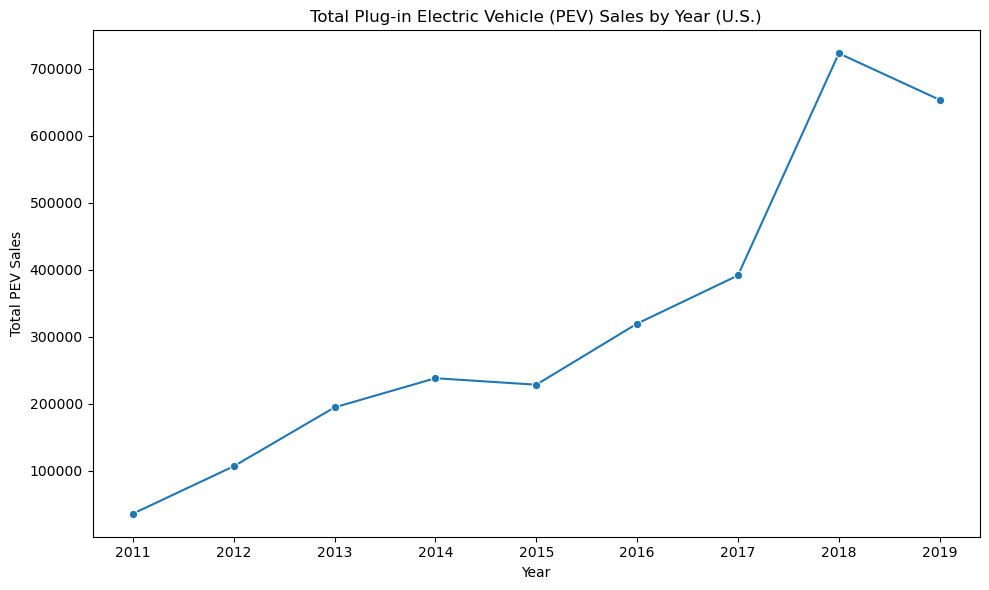

In [210]:
plt.figure(figsize=(10,6))
sns.lineplot(data=pev_sales_by_year, x="year", y="sales", marker="o", color="tab:blue")
plt.title("Total Plug-in Electric Vehicle (PEV) Sales by Year (U.S.)")
plt.xlabel("Year")
plt.ylabel("Total PEV Sales")
plt.tight_layout()
plt.show()

In [211]:
top10_pev = pev_sales.groupby("vehicle", as_index=False)["total"].sum().sort_values("total", ascending=False).head(10)
top10_pev

,vehicle,total
55,Tesla Model 3,296392.0
56,Tesla Model S,162285.0
14,Chevy Volt,156733.0
44,Nissan Leaf,141888.0
52,Prius PHEV,116927.0
57,Tesla Model X,87033.0
21,Ford Fusion Energi,68509.0
12,Chevy Bolt,58208.0
19,Ford C-Max Energi,42231.0
8,BMW i3,41988.0


/var/folders/yf/rphrjvld5m9f1mf5tfgxhc3c0000gn/T/ipykernel_21987/2072468758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_pev, x="total", y="vehicle", palette="Blues_r")


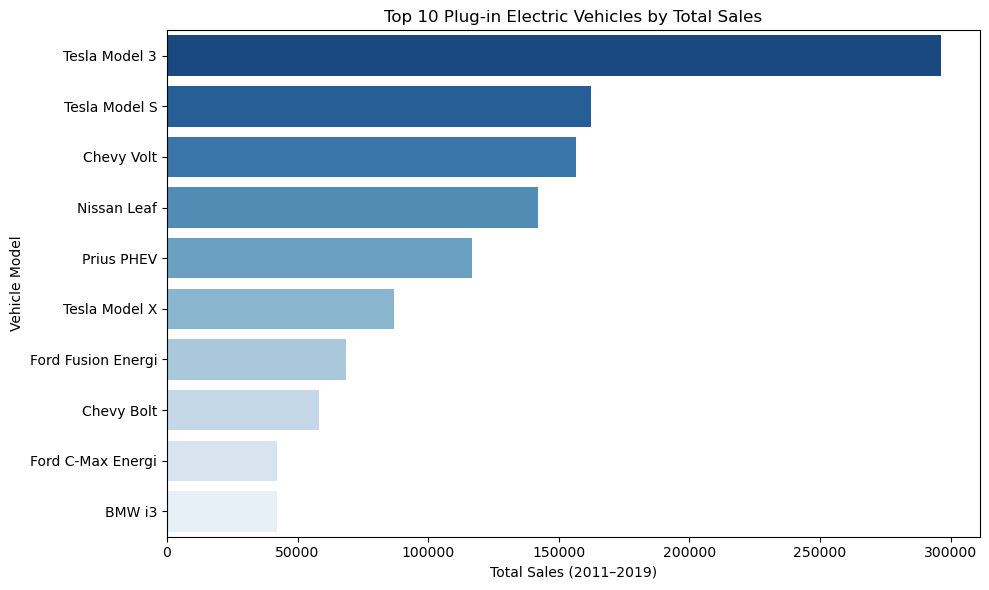

In [212]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10_pev, x="total", y="vehicle", palette="Blues_r")
plt.title("Top 10 Plug-in Electric Vehicles by Total Sales")
plt.xlabel("Total Sales (2011–2019)")
plt.ylabel("Vehicle Model")
plt.tight_layout()
plt.show()

In [213]:
# Correlation
corr = merged["sales"].corr(merged["gasoline_price_(2023_$/gallon)"])
print(f"Correlation between gas prices and EV sales: {corr:.2f}")

Correlation between gas prices and EV sales: -0.76


In [214]:
#Summary Stats
print("\n=== EV Sales Summary ===")
print(pev_sales_by_year.describe())
print("\n=== Gas Prices Summary ===")
print(gas_prices.describe())
print("\n=== Top 10 EV Models ===")
print(top10_pev)


=== EV Sales Summary ===
              year          sales
count     9.000000       9.000000
mean   2015.000000  320910.444444
std       2.738613  233416.766964
min    2011.000000   35526.000000
25%    2013.000000  194204.000000
50%    2015.000000  237764.000000
75%    2017.000000  391162.000000
max    2019.000000  722630.000000

=== Gas Prices Summary ===
0             year  gasoline_price_($/gallon)  gasoline_price_(2023_$/gallon)
count    74.000000                  74.000000                       74.000000
mean   1986.500000                   1.318095                        3.162439
std      21.505813                   1.062771                        0.676131
min    1950.000000                   0.268000                        1.980330
25%    1968.250000                   0.339750                        2.657127
50%    1986.500000                   1.119500                        3.138555
75%    2004.750000                   2.076500                        3.354025
max    2023.0000

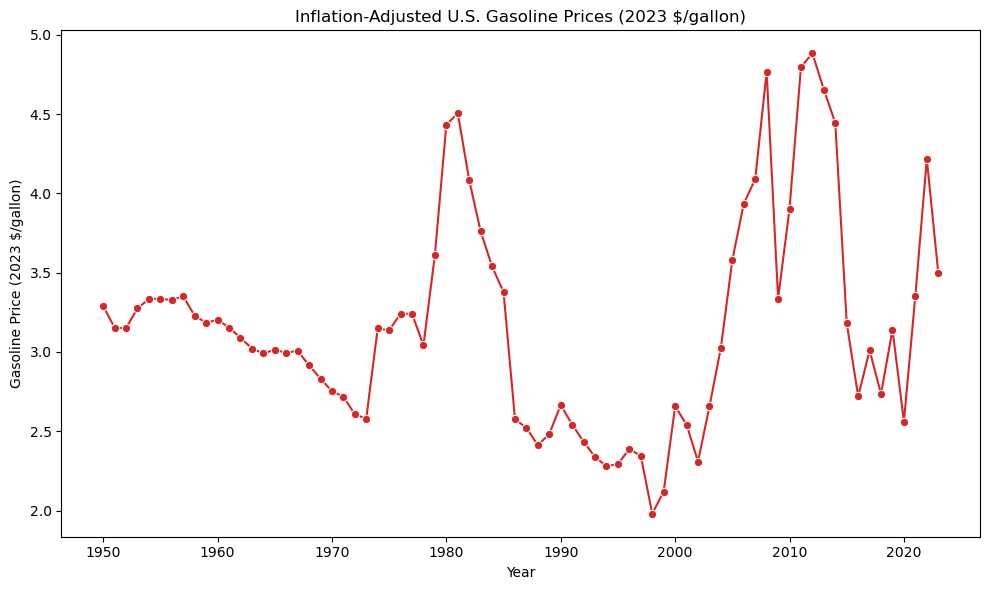

In [215]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=gas_prices,
    x="year",
    y="gasoline_price_(2023_$/gallon)",
    marker="o",
    color="tab:red"
)
plt.title("Inflation-Adjusted U.S. Gasoline Prices (2023 $/gallon)")
plt.xlabel("Year")
plt.ylabel("Gasoline Price (2023 $/gallon)")
plt.tight_layout()
plt.show()

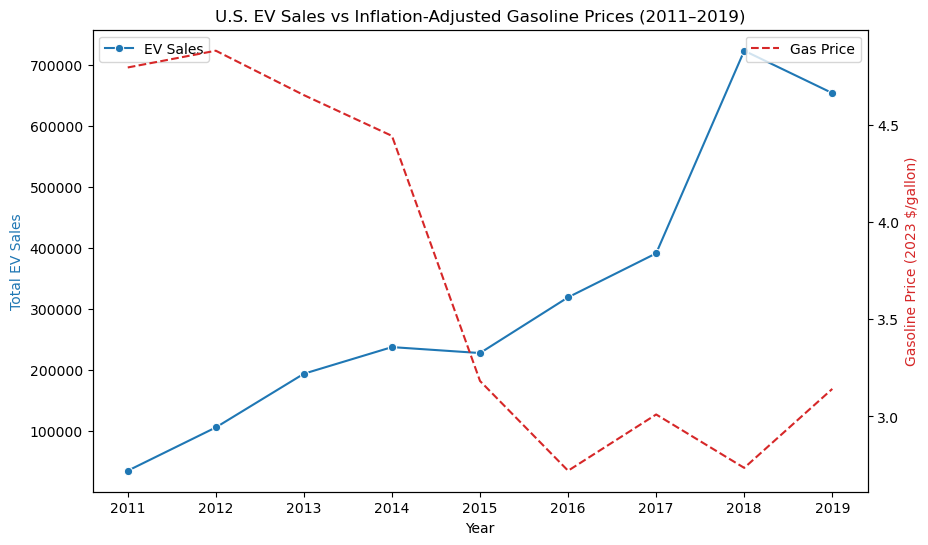

In [216]:
# Visualization
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=pev_sales_by_year, x="year", y="sales", color="tab:blue", marker="o", label="EV Sales")
ax2 = ax1.twinx()
sns.lineplot(data=gas_prices_filtered, x="year", y="gasoline_price_(2023_$/gallon)", color="tab:red", linestyle="--", label="Gas Price", ax=ax2)

ax1.set_xlabel("Year")
ax1.set_ylabel("Total EV Sales", color="tab:blue")
ax2.set_ylabel("Gasoline Price (2023 $/gallon)", color="tab:red")
plt.title("U.S. EV Sales vs Inflation-Adjusted Gasoline Prices (2011–2019)")
plt.show()

**Hypothesis Testing**

Null hypothesis (H₀): There is no correlation between gas prices and EV sales.
Alternative hypothesis (H₁): There is a significant correlation between gas prices and EV sales.

In [217]:
merged.rename(columns={
    'gasoline_price_(2023_$/gallon)': 'gasoline ($/gallon)'
}, inplace=True)

In [218]:
# Pearson correlation and p-value
corr, p_value = pearsonr(merged['gasoline ($/gallon)'], merged['sales'])

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation: -0.756
P-value: 0.018


Pearson correlation = -0.756 → This indicates a strong negative correlation between gas prices and EV sales.